In [16]:
input = ['../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs.est', 
         '../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_p-anc.txt', 
         '../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs.hap']
output = ['../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_polarized.hap']

In [20]:
nucs = ['A', 'C', 'G', 'T'] #order of nucleotides in est
nflips = 0 #counting how many times the reference allele is derived
ntot = 0
with open(input[0],'r') as f: #est input file with counts of alleles 
    with open(input[1],'r') as g:  #p-values from est-sfs
        for _ in range(8): #skip first 8 lines (header)
            next(g)
        with open(input[2],'r') as h: #hap file
            with open(output[0],'w') as out: #polarized hap file
                for i, (est, p, hap) in enumerate(zip(f, g, h)): #one line at a time
                    # get major and minor alleles (note: do this like est-sfs.c, which takes care of alleles at equal frequency)
                    n = [int(i) for i in est.split(' ')[0].split(',')] #count of nucleotides at site within focal species
                    # major
                    max_n = -1
                    for i in range(4):
                        if n[i] > max_n:
                            max_n = n[i]
                            major = i
                    major = nucs[major] #most numerous allele
                    # minor
                    min_n = -1
                    for i in range(4):
                        if n[i] > min_n and i != major:
                            min_n = n[i]
                            minor = i
                    minor = nucs[minor] #second most numerous allele
                    # make major ancestral unless probability of this is <0.5
                    pv = float(p.split(' ')[2]) # probability major is ancestral
                    ancestral = major
                    derived = minor
                    if pv < 0.5:
                        ancestral = minor
                        derived = major
                    # get ref and alt alleles
                    haps = hap.split(' ')
                    reference = haps[3] #reference allele
                    alternate = haps[4] #alternate allele
                    # only need to flip allele if reference is not ancestral
                    if reference != ancestral:
                        nflips += 1
                        haps[3] = ancestral #make the reference allele ancestral
                        haps[4] = derived #make the alternate allele derived
                        haps[5:] = [1 - int(i[0]) for i in haps[5:]] #flip the haps (make 0 -> 1 and 1 -> 0)
                        hap = (' ').join(map(str,haps)) + '\n'
                    # write to outfile
                    out.write(hap)
                    ntot += 1
print('flipped',nflips,'out of',ntot,'alleles, as a fraction:',nflips/ntot)

flipped 45874 out of 665800 alleles, as a fraction: 0.06890057074196455


In [29]:
with open('../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs.hap','r') as f:
    for i,line in enumerate(f):
        data = line.split(' ')
        print(data[5:])
        if i==5:
            break

['0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '1*', '1*', '0*', '0*', '1*', '1*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*\n']
['0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '1*', '1*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', '0*', 

In [30]:
line = '0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'

In [32]:
sum(list(map(int,line.split(' '))))

2

In [35]:
input = ['../data/T2T_Athaliana_66.Chr4.nomissing.nohet.justSNPs.hap']
output = ['../data/T2T_Athaliana_66.Chr4.nomissing.nohet.justSNPs_haploid.hap']

with open(input[0],'r') as f:
    with open(output[0],'w') as g:
        for line in f:
            data = line.split(' ')
            new_data = (' ').join(data[:5]) + ' ' + (' ').join([i[0] for i in data[5:][::2]]) + '\n'
            g.write(new_data)

In [45]:
tree = 'bps{START}-{STOP}.newick'
file = '../data/T2T_Athaliana_66.Chr4.nomissing.nohet.justSNPs_haploid_polarized_masked_popsize.bps'
[tree.replace('{START}',str(i)).replace('{STOP}',str(j)) for i,j in np.loadtxt(file, dtype='int')]

['bps3947-4001.newick',
 'bps123343-123861.newick',
 'bps186114-186632.newick',
 'bps279108-280046.newick',
 'bps368166-369209.newick',
 'bps481538-483710.newick',
 'bps567864-568050.newick',
 'bps698951-699071.newick',
 'bps788046-788113.newick',
 'bps926755-927526.newick',
 'bps1048927-1049458.newick',
 'bps1159418-1167571.newick',
 'bps1235817-1237312.newick',
 'bps1394159-1394780.newick',
 'bps1516846-1516907.newick',
 'bps1964470-1964669.newick',
 'bps2242564-2242857.newick',
 'bps2387047-2387082.newick',
 'bps2494327-2494637.newick',
 'bps2720091-2720631.newick',
 'bps3893291-3898061.newick',
 'bps5168833-5169829.newick',
 'bps5370713-5371315.newick',
 'bps5496566-5497155.newick',
 'bps5735950-5735950.newick',
 'bps6022233-6022393.newick',
 'bps6160286-6160404.newick',
 'bps6290797-6291218.newick',
 'bps6417084-6417583.newick',
 'bps6522293-6522489.newick',
 'bps6683529-6690577.newick',
 'bps6821435-6823194.newick',
 'bps6906368-6906538.newick',
 'bps7055324-7055616.newick',
 'bp

In [54]:
with open(file, 'r') as bps: 
    for line in bps: 
        i,j = line.strip().split(' ')
        print(tree.replace('{START}',i).replace('{STOP}',j))

bps3947-4001.newick
bps123343-123861.newick
bps186114-186632.newick
bps279108-280046.newick
bps368166-369209.newick
bps481538-483710.newick
bps567864-568050.newick
bps698951-699071.newick
bps788046-788113.newick
bps926755-927526.newick
bps1048927-1049458.newick
bps1159418-1167571.newick
bps1235817-1237312.newick
bps1394159-1394780.newick
bps1516846-1516907.newick
bps1964470-1964669.newick
bps2242564-2242857.newick
bps2387047-2387082.newick
bps2494327-2494637.newick
bps2720091-2720631.newick
bps3893291-3898061.newick
bps5168833-5169829.newick
bps5370713-5371315.newick
bps5496566-5497155.newick
bps5735950-5735950.newick
bps6022233-6022393.newick
bps6160286-6160404.newick
bps6290797-6291218.newick
bps6417084-6417583.newick
bps6522293-6522489.newick
bps6683529-6690577.newick
bps6821435-6823194.newick
bps6906368-6906538.newick
bps7055324-7055616.newick
bps7163138-7163285.newick
bps7295263-7296563.newick
bps7429489-7429841.newick
bps7518173-7518872.newick
bps7602237-7602534.newick
bps7678450

In [40]:
np.loadtxt?

array([[    3947,     4001],
       [  123343,   123861],
       [  186114,   186632],
       [  279108,   280046],
       [  368166,   369209],
       [  481538,   483710],
       [  567864,   568050],
       [  698951,   699071],
       [  788046,   788113],
       [  926755,   927526],
       [ 1048927,  1049458],
       [ 1159418,  1167571],
       [ 1235817,  1237312],
       [ 1394159,  1394780],
       [ 1516846,  1516907],
       [ 1964470,  1964669],
       [ 2242564,  2242857],
       [ 2387047,  2387082],
       [ 2494327,  2494637],
       [ 2720091,  2720631],
       [ 3893291,  3898061],
       [ 5168833,  5169829],
       [ 5370713,  5371315],
       [ 5496566,  5497155],
       [ 5735950,  5735950],
       [ 6022233,  6022393],
       [ 6160286,  6160404],
       [ 6290797,  6291218],
       [ 6417084,  6417583],
       [ 6522293,  6522489],
       [ 6683529,  6690577],
       [ 6821435,  6823194],
       [ 6906368,  6906538],
       [ 7055324,  7055616],
       [ 71631

In [10]:
# load ids
ids = []
ids_file='../data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid.samples' #choose any chromosome (all same)
with open(ids_file, mode='r') as file:
    next(file); next(file) #skip header and 0 row
    for line in file: 
        ids.append(line.strip().split(' ')[0]) #accession id

# load metadata
metadata = []
with open('../data/66_genomes_summary.txt','r') as file:
    next(file) #skip header
    for line in file:
        metadata.append(line.strip().split('\t'))

# the accession id is in 2 places, and a bit inconsistent, so isolate both
accessions = [i[1].strip().replace('_','.').split('.')[0].replace('"','') for i in metadata]
accessions2 = [i[3] for i in metadata]

# now get the metadata indices in order of the ids in the sample file
order = []
for id in ids:
    try:
        ix = accessions.index(id)
    except:
        ix = accessions2.index(id)
    order.append(ix)
    
# make poplabels file
with open('../data/test.poplabels','w') as out:
    out.write('sample population group sex \n')
    for i,ix in enumerate(order):
        out.write(ids[i] + ' ' + metadata[ix][2].replace(' ','-') + ' 0 1 \n' ) #for haploids

In [9]:
[i[2].replace(' ','-') for i in metadata]

['Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Eurasian',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Iberian-relict',
 'Non-Iberian-relict',
 'Non-Iberian-relict',
 'Non-Iberian-relict',
 'Non-Iberian-relict']

# processing trees

In [80]:
tsd = ts.decapitate(1e5)

In [81]:
tsd

In [83]:
tree = tsd.first()

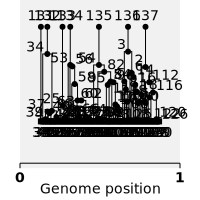

In [84]:
tsd.draw_svg()

In [2]:
def shared_times(tree, samples, tCutoff=None):
    '''shared times between pairs of samples in tskit tree'''

    T = tree.time(tree.root) #tmrca
    k = len(samples)
    sts = np.zeros((k,k))
    for i in range(k):
        sts[i,i] = T #shared time with self
        for j in range(i):
            st = T - tree.tmrca(samples[i],samples[j]) #shared time of pair
            sts[i,j] = st
            sts[j,i] = st

    if tCutoff is None or tCutoff > T:
        return [sts], [[samples[i] for i in range(k)]] #return a single tree
            
    else:
        shared_time = tCutoff - (T-sts) #shared time since tCutoff

        # get shared times and samples in each subtrees
        sts = [] #start list with shared times in subtree with i
        smpls = [] #samples in this subtree
        taken = [False for _ in range(k)]
        while sum(taken) < k: #while some samples not yet in a subtree
            i = np.argmax(taken == False) #choose next sample not yet in a subtree
            withi = shared_time[i] >= 0 #true if shares time with i
            timesi = shared_time[withi][:, withi] #shared times of subtree with i
            timesi = timesi - np.min(timesi) #trim
            sts.append(timesi) #append        
            smpls.append(samples[np.where(withi)[0]]) #samples in this subtree
            taken = np.array([i[0] or i[1] for i in zip(taken, withi)]) #samples already in a subtree
            
        return sts, smpls #return list of shared times and samples in each subtree

In [28]:
def coal_times(tree):
    '''coalescence times in tskit tree'''

    cts = [tree.time(i) for i in tree.nodes() if not tree.is_sample(i)]
    
    return sorted(cts)

In [3]:
CHR = 4 #CHOOSE CHROMOSOME 
Ne = 1e5 #choose Ne prior (very little effect)
m = '7e-9' #choose mu prior (unknown effect)
basename = '../data/T2T_Athaliana_66.Chr%d.nomissing.nohet.justSNPs_haploid_polarized_masked_%dNe_%sm_popsize' %(CHR,Ne,m)
newickfile = basename + '_bps3947-4001.newick'
newickfile

'../data/T2T_Athaliana_66.Chr4.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_bps3947-4001.newick'

In [44]:
import tsconvert
import numpy as np
import time

In [61]:
max_n_trees = 1000
tCutoff = None

In [62]:
t0 = time.time()

with open(newickfile, mode='r') as infile:
    
    for i,line in enumerate(infile): 
    
        if i>0 and i<max_n_trees+1: # skip header and don't use too many trees
        
            # load tskit tree
            tree_string = line.split()[4] #extract newick string only (Relate adds some info beforehand)
            ts = tsconvert.from_newick(tree_string) #convert to a 1-tree tskit treesequence for processing
            tree = ts.first() #the 1 and only tskit tree
            
            # get times
            sts, smpls = shared_times(tree, ts.samples(), tCutoff) #shared times and corresponding order of samples in each subtree
            smpls = [[int(ts.node(i).metadata['name']) for i in j] for j in smpls] #replace node id with node 'name', to align with metadata
            cts = coal_times(tree) #coalescent times (for importance sampling)
            
print(time.time() - t0)

18.72321391105652


In [56]:
def shared_times_dendropy(tree, samples, tCutoff=None):
    '''shared times between pairs of samples in dendropy tree'''

    pdm = tree.phylogenetic_distance_matrix() #denropy method to get time between samples
    taxa = np.array([i.taxon for i in tree.leaf_nodes()]) #taxa representing each sample
    k = len(taxa) #number of samples
    tmrcas = np.zeros((k,k)) #matrix to store tmrcas
    for i in range(k):
        for j in range(i):
            tmrcas[i,j] = pdm(taxa[i],taxa[j])/2 #time to mrca is 1/2 of time between samples
            tmrcas[j,i] = tmrcas[i,j] #symmetric
    T = np.max(tmrcas) #time to most recent common ancestor of all samples
    sts = T - tmrcas #convert to shared times

    if tCutoff is None or tCutoff > T:
        return [sts], [[samples[i] for i in range(k)]] #return a single tree
            
    else:
        shared_time = tCutoff - (T-sts) #shared time since tCutoff

        # get shared times and samples in each subtrees
        sts = [] #start list with shared times in subtree with i
        smpls = [] #samples in this subtree
        taken = [False for _ in range(k)]
        while sum(taken) < k: #while some samples not yet in a subtree
            i = np.argmax(taken == False) #choose next sample not yet in a subtree
            withi = shared_time[i] >= 0 #true if shares time with i
            timesi = shared_time[withi][:, withi] #shared times of subtree with i
            timesi = timesi - np.min(timesi) #trim
            sts.append(timesi) #append        
            smpls.append(samples[np.where(withi)[0]]) #samples in this subtree
            taken = np.array([i[0] or i[1] for i in zip(taken, withi)]) #samples already in a subtree
            
        return sts, smpls #return list of shared times and samples in each subtree

In [50]:
def coal_times_dendropy(tree):
    '''coalescence times in dendropy tree'''

    cts = np.array(tree.internal_node_ages(ultrametricity_precision=False))
    
    return cts

In [54]:
from io import StringIO
import dendropy

In [63]:
t0 = time.time()

with open(newickfile, mode='r') as infile:
    
    for i,line in enumerate(infile): 
    
        if i>0 and i<max_n_trees+1: # skip header and don't use too many trees
        
            # load tskit tree
            tree_string = StringIO(line.split()[4]) #extract newick string only (Relate adds some info beforehand)
            tree = dendropy.Tree.get(file=tree_string, schema='newick') #append to list of dendropy trees
            
            # get times
            sts, smpls = shared_times_dendropy(tree, ts.samples(), tCutoff) #shared times and corresponding order of samples in each subtree
#             smpls = [[int(ts.node(i).metadata['name']) for i in j] for j in smpls] #replace node id with node 'name', to align with metadata
            cts = coal_times_dendropy(tree) #coalescent times (for importance sampling)
            
print(time.time() - t0)

25.64438557624817


In [66]:
np.save('../data/test_sts.npy', np.array(sts, dtype=object), allow_pickle=True)

In [67]:
sts_test = np.load('../data/test_sts.npy', allow_pickle=True)

In [69]:
sts

[array([[6.17959053e+05, 5.75692300e+05, 5.75692298e+05, ...,
         3.11200006e-03, 3.14849999e-03, 3.14849999e-03],
        [5.75692300e+05, 6.17959053e+05, 5.84081181e+05, ...,
         3.60000005e-03, 3.63649998e-03, 3.63649998e-03],
        [5.75692298e+05, 5.84081181e+05, 6.17959053e+05, ...,
         2.13549996e-03, 2.17200001e-03, 2.17200001e-03],
        ...,
        [3.11200006e-03, 3.60000005e-03, 2.13549996e-03, ...,
         6.17959053e+05, 6.15637912e+05, 6.15637912e+05],
        [3.14849999e-03, 3.63649998e-03, 2.17200001e-03, ...,
         6.15637912e+05, 6.17959053e+05, 6.17922473e+05],
        [3.14849999e-03, 3.63649998e-03, 2.17200001e-03, ...,
         6.15637912e+05, 6.17922473e+05, 6.17959053e+05]])]

In [76]:
len(sts_test)

1

In [77]:
np.array(sts)

array([[[6.17959053e+05, 5.75692300e+05, 5.75692298e+05, ...,
         3.11200006e-03, 3.14849999e-03, 3.14849999e-03],
        [5.75692300e+05, 6.17959053e+05, 5.84081181e+05, ...,
         3.60000005e-03, 3.63649998e-03, 3.63649998e-03],
        [5.75692298e+05, 5.84081181e+05, 6.17959053e+05, ...,
         2.13549996e-03, 2.17200001e-03, 2.17200001e-03],
        ...,
        [3.11200006e-03, 3.60000005e-03, 2.13549996e-03, ...,
         6.17959053e+05, 6.15637912e+05, 6.15637912e+05],
        [3.14849999e-03, 3.63649998e-03, 2.17200001e-03, ...,
         6.15637912e+05, 6.17959053e+05, 6.17922473e+05],
        [3.14849999e-03, 3.63649998e-03, 2.17200001e-03, ...,
         6.15637912e+05, 6.17922473e+05, 6.17959053e+05]]])

# composite dispersal rates

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
locations = np.load('data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_locations.npy')
n = len(locations) #number of samples
Tmat = np.identity(n) - [[1/n for _ in range(n)] for _ in range(n)]; Tmat = Tmat[:-1]; #matrix for mean centering and dropping one sample
locations_centered = np.matmul(Tmat, locations) #mean center location

In [3]:
stss_files = ['data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_643-723bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_643-723bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_115566-115601bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_115566-115601bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_176184-177208bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_176184-177208bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_259513-259823bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_259513-259823bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_435455-435537bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_435455-435537bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_508400-509633bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_508400-509633bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_607493-607631bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_607493-607631bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_728431-728814bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_728431-728814bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_900657-900894bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_900657-900894bps_1000nsamples_sts_logdet.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_1040290-1042321bps_1000nsamples_sts_mc_inv.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_1040290-1042321bps_1000nsamples_sts_logdet.npy']
btss_files = ['data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_643-723bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_643-723bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_115566-115601bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_115566-115601bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_176184-177208bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_176184-177208bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_259513-259823bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_259513-259823bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_435455-435537bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_435455-435537bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_508400-509633bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_508400-509633bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_607493-607631bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_607493-607631bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_728431-728814bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_728431-728814bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_900657-900894bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_900657-900894bps_1000nsamples_lpcs.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_1040290-1042321bps_1000nsamples_bts.npy', 'data/T2T_Athaliana_66.Chr1.nomissing.nohet.justSNPs_haploid_polarized_masked_100000Ne_7e-9m_popsize_10numiter_0.5threshold_1040290-1042321bps_1000nsamples_lpcs.npy']

In [4]:
stss_mc_inv = []
stss_logdet = []
i = 0
for f in tqdm(stss_files):
    if i % 2 == 0:
        sts_mc_inv = np.load(f) #mean centered and inverted shared time matrices
        stss_mc_inv.append(sts_mc_inv)
    else:
        sts_logdet = np.load(f)
        stss_logdet.append(sts_logdet) #log determinants of mean centered shared time matrices
    i += 1
stss_mc_inv = np.array(stss_mc_inv)
stss_logdet = np.array(stss_logdet)

100%|██████████| 20/20 [00:00<00:00, 32.29it/s]


In [5]:
btss = []
logpcoals = []
i = 0
for f in tqdm(btss_files):
    if i % 2 == 0:
        bts = np.load(f) #branching times
        btss.append(bts)
    else:
        logpcoal = np.load(f) #log probability of coalescent times
        logpcoals.append(logpcoal)
    i += 1
btss = np.array(btss)
logpcoals = np.array(logpcoals)

100%|██████████| 20/20 [00:00<00:00, 1986.36it/s]


In [6]:
from spacetrees import mle_dispersal_numeric, _sds_rho_to_sigma

In [7]:
def callbackF(x):
    print('{0: 3.6f}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(x[0], x[1], x[2], x[3]))

# find parameter estimates
mle = mle_dispersal_numeric(locations=locations_centered, shared_times_inverted=stss_mc_inv, log_det_shared_times=stss_logdet,
                            sigma0=_sds_rho_to_sigma(0.064,0.056,0.504), callbackF=callbackF,
                            important=True, branching_times=btss, logpcoals=logpcoals) #supplying mle with 100 trees as blup estimate nearly twice that

number of loci: 10 
number of trees per locus: 1000 
number of samples: 65 
number of spatial dimensions: 2
multiplying branching rate by: 2366.8056049242678
searching for maximum likelihood parameters...
 0.064000    0.056000    0.504000    0.000027
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2
66 2

KeyboardInterrupt: 